<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.623839  37.451801  35.866901  0.146568  128.089109   
      1.0    47.067808  95.047509  91.779690 -0.219056  243.675951   
      2.0    99.291665  61.179446  95.992578 -0.009959  266.453730   
      3.0    36.059748  81.961304  62.806562  0.054140  190.881754   
      4.0    22.561835  57.403703  99.891733 -0.163465  189.693806   
...                ...        ...        ...       ...         ...   
999.0 25.0   22.165046  31.666469  56.220772  0.189110  120.241396   
      26.0   93.324773  99.972234  27.596461 -0.012894  230.880574   
      27.0   28.102838  93.083445  72.411123 -0.058303  203.539103   
      28.0   30.257867  20.848863  55.174370 -0.064395  116.216705   
      29.0   90.716789  93.036058  71.241563  0.180178  265.174588   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    127.936799  0.152309  
      1.0    244.002489 -0.326537  
      2.0    266.520483 -0.066752  
      3.0    190.892882 -0.011128  
      4.0    189.973541 -0.279735  
...                 ...       ...  
999.0 25.0   120.125141  0.116256  
      26.0   230.853054  0.027520  
      27.0   203.543447 -0.004344  
      28.0   116.387291 -0.170586  
      29.0   265.004554  0.170035  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.623839  37.451801  35.866901  0.146568  128.089109   
      1.0    47.067808  95.047509  91.779690 -0.219056  243.675951   
      2.0    99.291665  61.179446  95.992578 -0.009959  266.453730   
      3.0    36.059748  81.961304  62.806562  0.054140  190.881754   
      4.0    22.561835  57.403703  99.891733 -0.163465  189.693806   
...                ...        ...        ...       ...         ...   
999.0 25.0   22.165046  31.666469  56.220772  0.189110  120.241396   
      26.0   93.324773  99.972234  27.596461 -0.012894  230.880574   
      27.0   28.102838  93.083445  72.411123 -0.058303  203.539103   
      28.0   30.257867  20.848863  55.174370 -0.064395  116.216705   
      29.0   90.716789  93.036058  71.241563  0.180178  265.174588   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    127.936799  0.152309  
      1.0    244.002489 -0.326537  
      2.0    266.520483 -0.066752  
      3.0    190.892882 -0.011128  
      4.0    189.973541 -0.279735  
...                 ...       ...  
999.0 25.0   120.125141  0.116256  
      26.0   230.853054  0.027520  
      27.0   203.543447 -0.004344  
      28.0   116.387291 -0.170586  
      29.0   265.004554  0.170035  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.623839  37.451801  35.866901  0.146568  128.089109   
      1.0    47.067808  95.047509  91.779690 -0.219056  243.675951   
      2.0    99.291665  61.179446  95.992578 -0.009959  266.453730   
      3.0    36.059748  81.961304  62.806562  0.054140  190.881754   
      4.0    22.561835  57.403703  99.891733 -0.163465  189.693806   
...                ...        ...        ...       ...         ...   
999.0 25.0   22.165046  31.666469  56.220772  0.189110  120.241396   
      26.0   93.324773  99.972234  27.596461 -0.012894  230.880574   
      27.0   28.102838  93.083445  72.411123 -0.058303  203.539103   
      28.0   30.257867  20.848863  55.174370 -0.064395  116.216705   
      29.0   90.716789  93.036058  71.241563  0.180178  265.174588   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    127.936799  0.152309  
      1.0    244.002489 -0.326537  
      2.0    266.520483 -0.066752  
      3.0    190.892882 -0.011128  
      4.0    189.973541 -0.279735  
...                 ...       ...  
999.0 25.0   120.125141  0.116256  
      26.0   230.853054  0.027520  
      27.0   203.543447 -0.004344  
      28.0   116.387291 -0.170586  
      29.0   265.004554  0.170035  

[30000 rows x 7 columns]

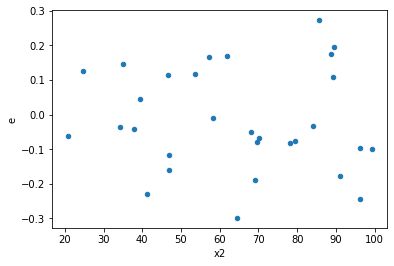

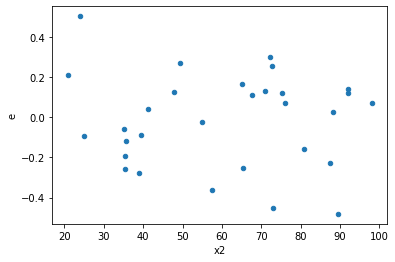

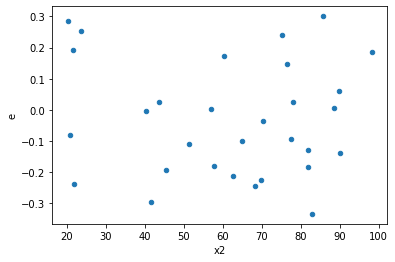

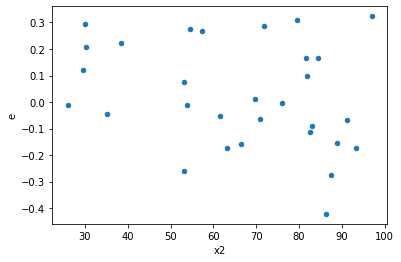

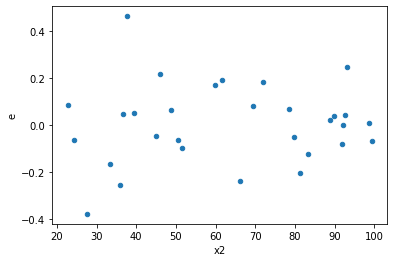

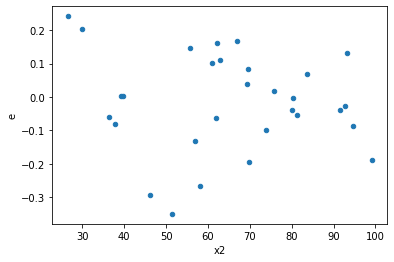

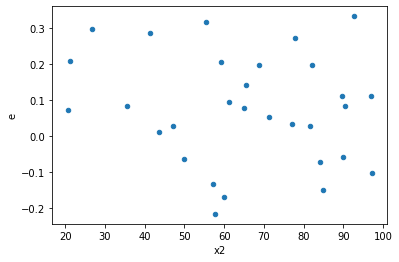

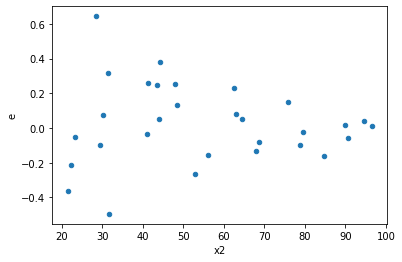

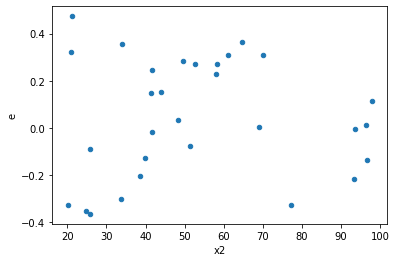

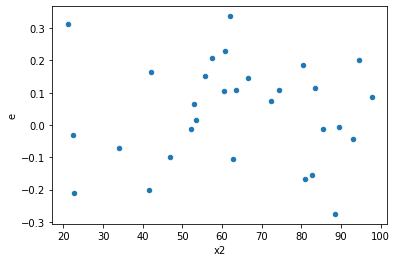

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,13.0,0.40061938255161944,0.8473086053359266,0.03641994386832904,0.0651775850258405,1.789612451394228,0.3167370412603361,0.841631479369832,0.15836852063016804,Reject005=1 : Homoscedasticity
2.0,15.0,9.0,0.5936038702607039,0.5690045334439612,0.039573591350713595,0.06322272593821791,1.5975988981621168,0.48312986016297454,0.7584350699185127,0.24156493008148727,Reject005=1 : Homoscedasticity
3.0,4.0,20.0,0.03596910125572163,0.4313439358830767,0.008992275313930407,0.021567196794153833,2.3984137541633044,0.16861395543175517,0.9156930222841224,0.08430697771587758,Reject005=1 : Homoscedasticity
4.0,9.0,15.0,0.13868938105837506,0.5166098140154372,0.015409931228708339,0.03444065426769581,2.234964826029443,0.16215136839816435,0.9189243158009178,0.08107568419908218,Reject005=1 : Homoscedasticity
5.0,15.0,9.0,0.44505273935095585,0.5360942331887224,0.029670182623397056,0.059566025909858045,2.007605637819229,0.29253496612065,0.853732516939675,0.146267483060325,Reject005=1 : Homoscedasticity
8.0,18.0,6.0,0.9105450802054805,0.38318249596574405,0.050585837789193365,0.06386374932762401,1.2624827840899613,0.824142943689536,0.587928528155232,0.412071471844768,Reject005=1 : Homoscedasticity
9.0,13.0,11.0,0.32148564239294375,0.6780819175820503,0.02472966479945721,0.061643810689277295,2.492707086374673,0.1376139393730802,0.9311930303134599,0.0688069696865401,Reject005=1 : Homoscedasticity
11.0,20.0,4.0,0.9602760423815955,0.2959255743998811,0.048013802119079775,0.07398139359997027,1.5408359749658624,0.7316871985291891,0.6341564007354055,0.36584359926459453,Reject005=1 : Homoscedasticity
12.0,14.0,10.0,0.2837992930800081,0.3293737860172255,0.020271378077143437,0.03293737860172255,1.624821878235323,0.444535267940229,0.7777323660298855,0.2222676339701145,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,13.0,0.40061938255161944,0.8473086053359266,0.03641994386832904,0.0651775850258405,1.789612451394228,0.3167370412603361,Reject005=1 : Homoscedasticity
1.0,11.0,13.0,0.5308322648752093,0.48354250332231186,0.04825747862501903,0.037195577178639375,0.7707733233985287,0.6732652516214366,Reject005=1 : Homoscedasticity
2.0,15.0,9.0,0.5936038702607039,0.5690045334439612,0.039573591350713595,0.06322272593821791,1.5975988981621168,0.48312986016297454,Reject005=1 : Homoscedasticity
3.0,4.0,20.0,0.03596910125572163,0.4313439358830767,0.008992275313930407,0.021567196794153833,2.3984137541633044,0.16861395543175517,Reject005=1 : Homoscedasticity
4.0,9.0,15.0,0.13868938105837506,0.5166098140154372,0.015409931228708339,0.03444065426769581,2.234964826029443,0.16215136839816435,Reject005=1 : Homoscedasticity
5.0,15.0,9.0,0.44505273935095585,0.5360942331887224,0.029670182623397056,0.059566025909858045,2.007605637819229,0.29253496612065,Reject005=1 : Homoscedasticity
6.0,10.0,14.0,0.562078774637322,0.49498168793313185,0.0562078774637322,0.03535583485236656,0.6290192131019305,0.4657111245853143,Reject005=1 : Homoscedasticity
7.0,15.0,9.0,1.1876229358284596,0.3690070513189849,0.07917486238856397,0.04100078347988721,0.5178510229505542,0.2497378620104672,Reject005=1 : Homoscedasticity
8.0,18.0,6.0,0.9105450802054805,0.38318249596574405,0.050585837789193365,0.06386374932762401,1.2624827840899613,0.824142943689536,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      873
Reject005=0 : Heteroscedasticity    127
Name: Result_test, dtype: int64